<a href="https://colab.research.google.com/github/tylerpan98/NLP-detect-language/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
import nltk
from nltk.corpus import stopwords
import contractions
import spacy
import string

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/NLP/


/content/drive/MyDrive/NLP


In [4]:
data = pd.read_csv('Language Detection.csv')

In [5]:
data

Text Language
0       Nature, in the broadest sense, is the natural...  English
1      "Nature" can refer to the phenomena of the phy...  English
2      The study of nature is a large, if not the onl...  English
3      Although humans are part of nature, human acti...  English
4      [1] The word nature is borrowed from the Old F...  English
...                                                  ...      ...
10332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada
10333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada
10334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada
10335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada
10336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada

[10337 rows x 2 columns]

In [6]:
data.shape

(10337, 2)

In [7]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

In [9]:
data.duplicated().sum()

66

In [10]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [11]:
data['Language'].value_counts()

Language
English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: count, dtype: int64

In [18]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['Text'] = data['Text'].apply(remove_html_tags)

<ipython-input-18-2e02124d66b5>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-18-2e02124d66b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text'] = data['Text'].apply(remove_html_tags)


In [21]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

data['Text'] = data['Text'].apply(remove_punctuation)


<ipython-input-21-c7dc55d7622e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text'] = data['Text'].apply(remove_punctuation)


In [23]:
from wordcloud import WordCloud

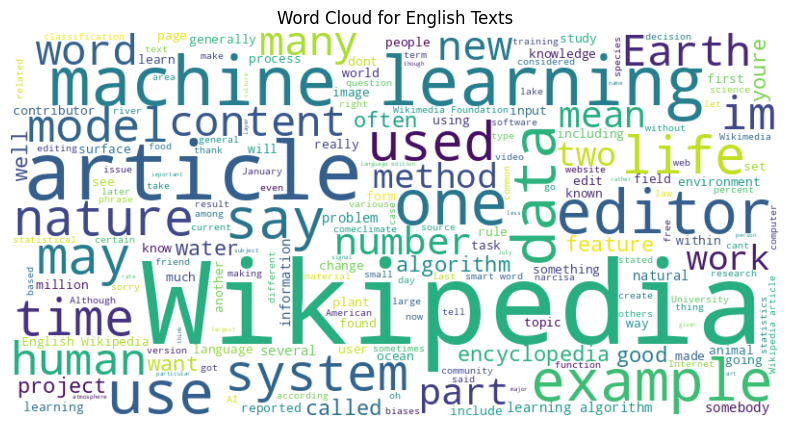

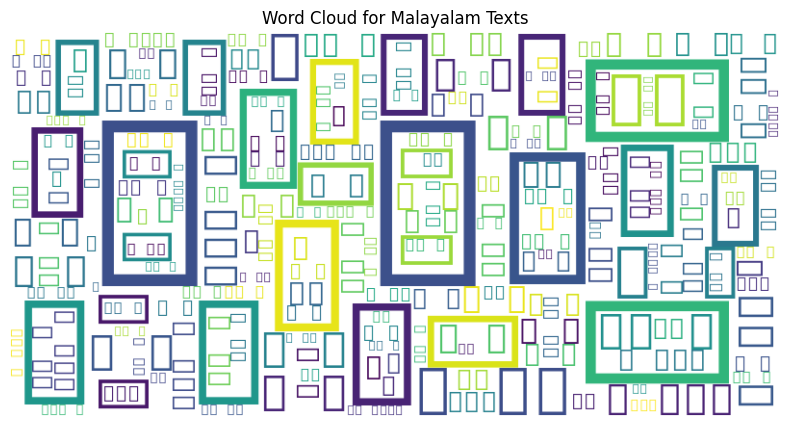

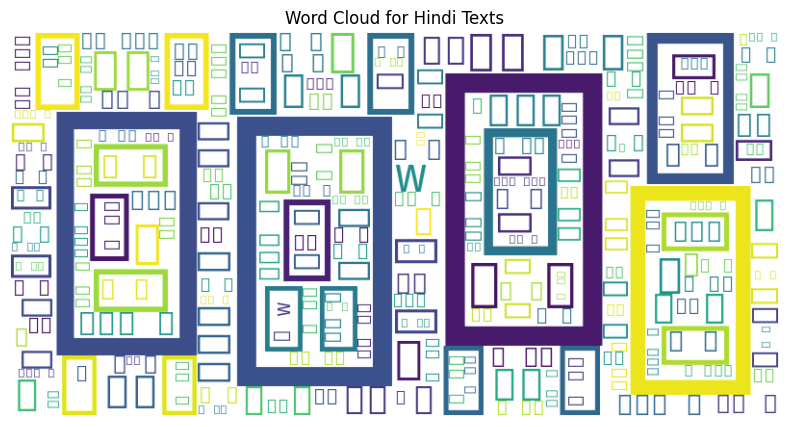

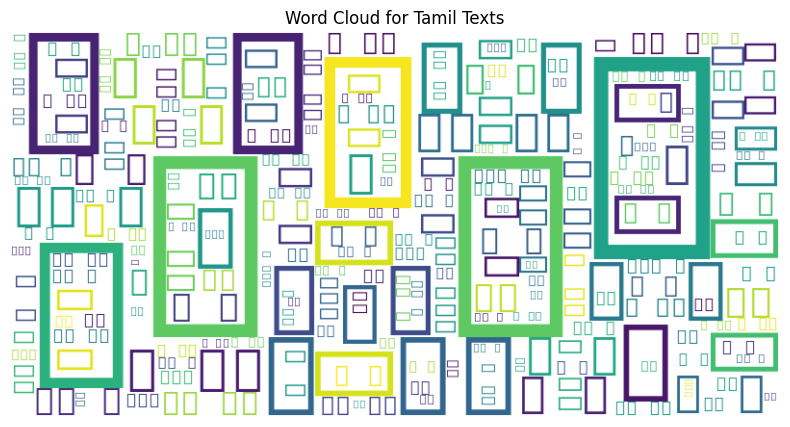

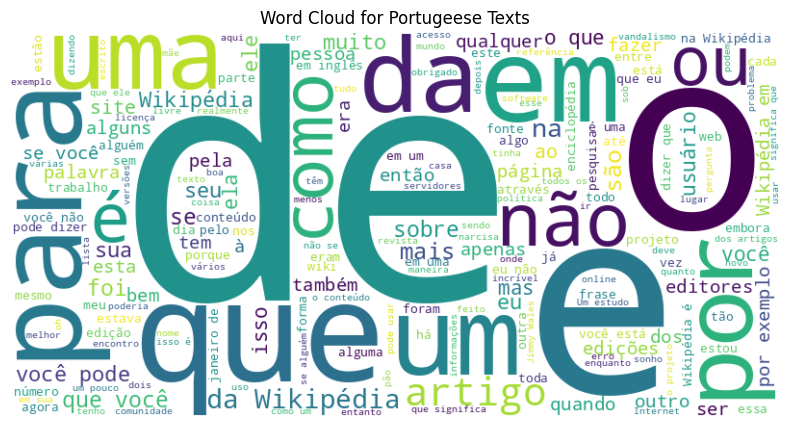

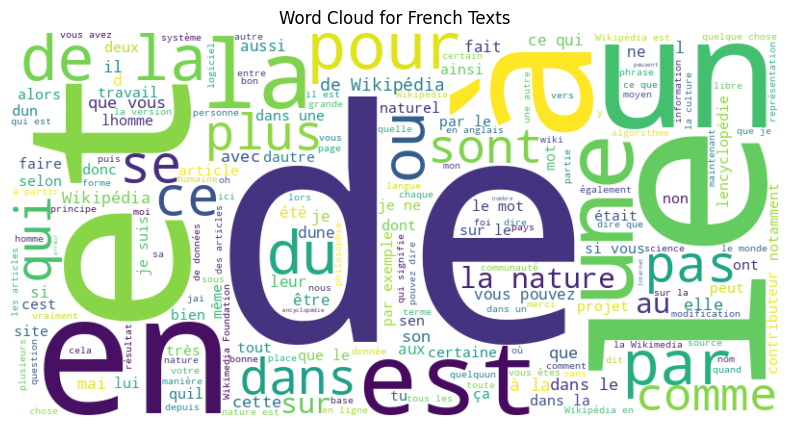

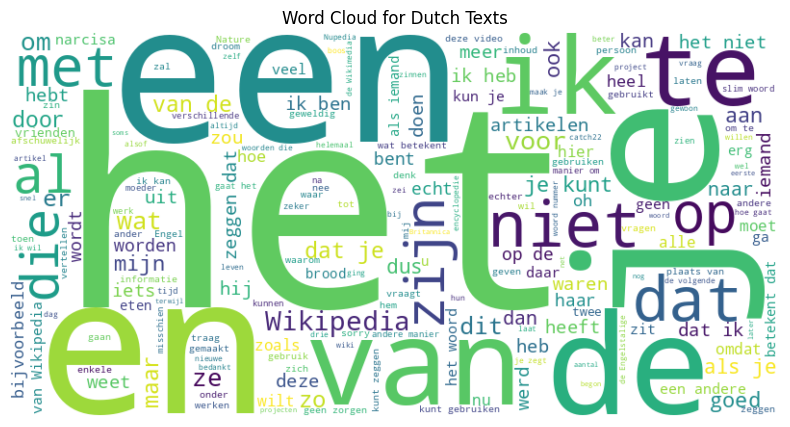

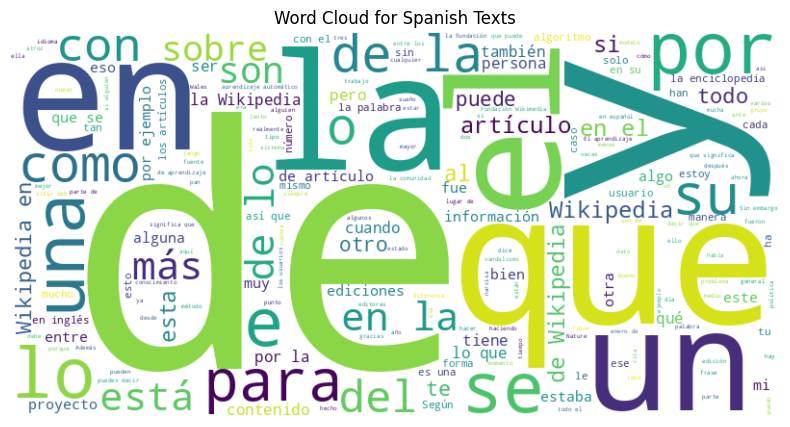

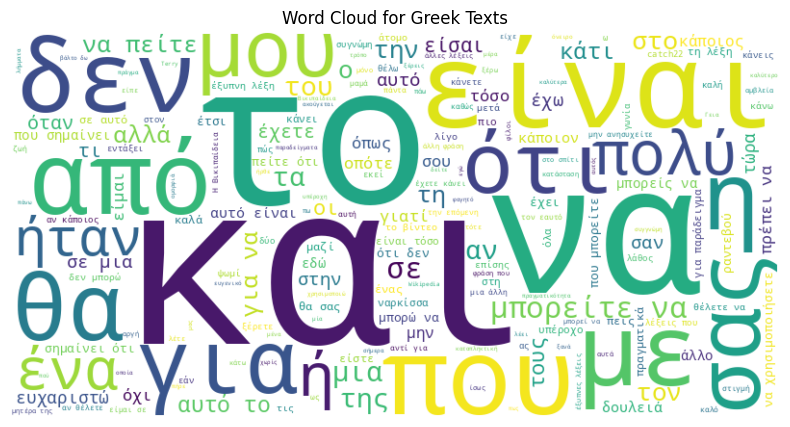

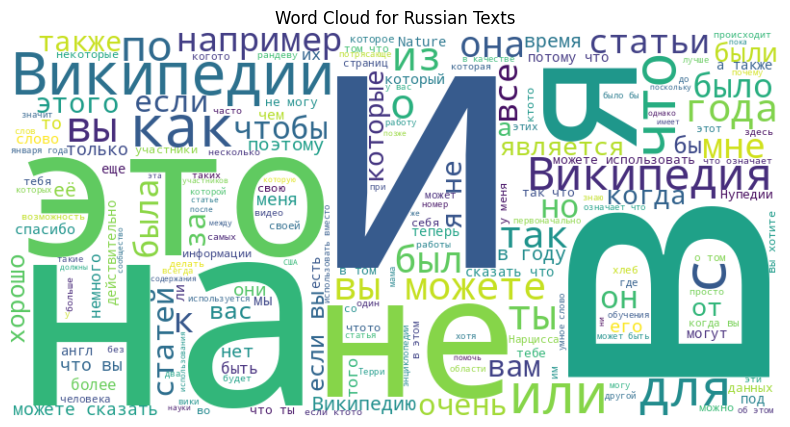

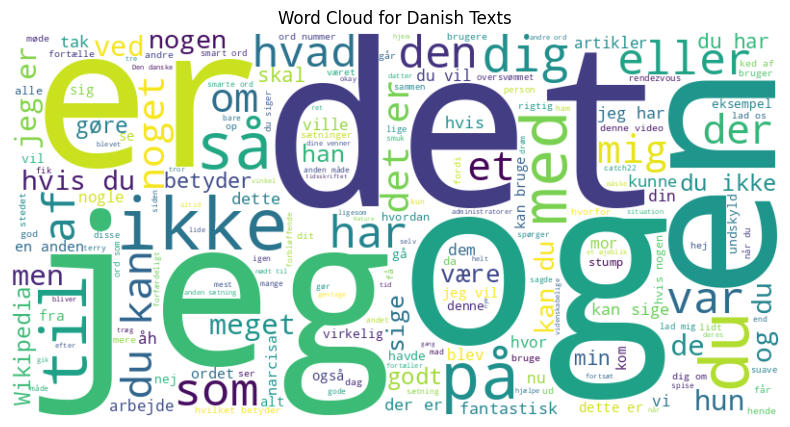

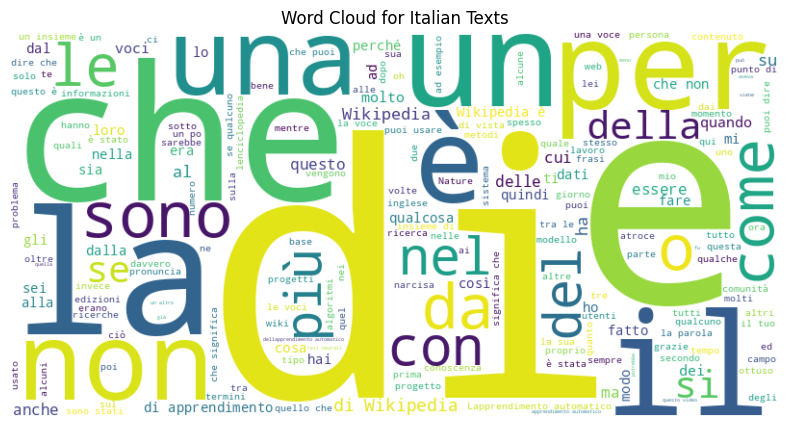

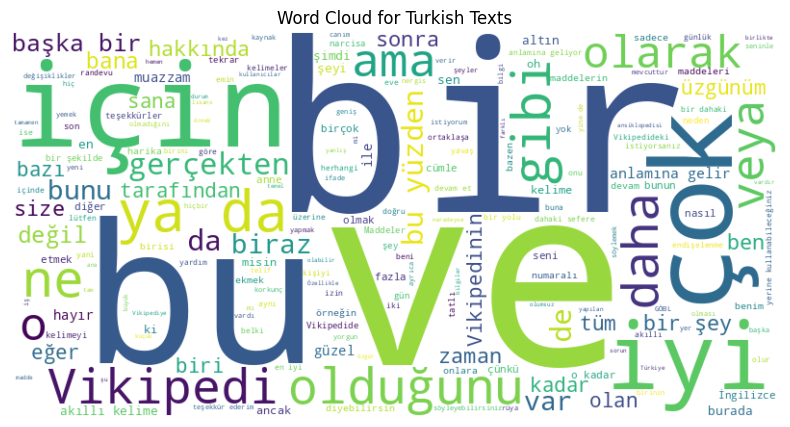

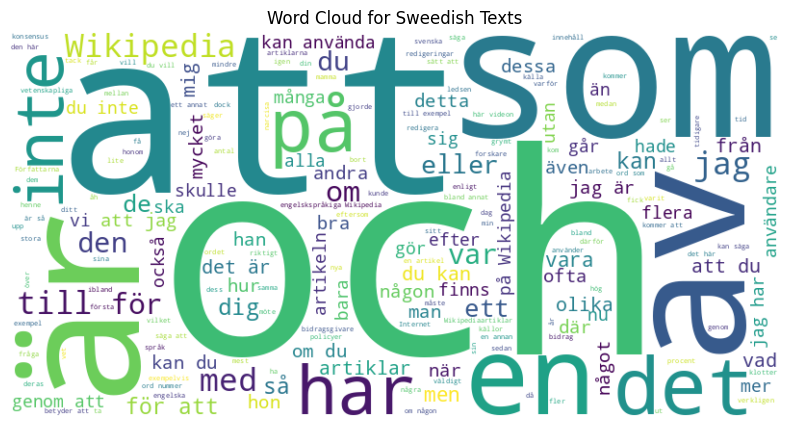

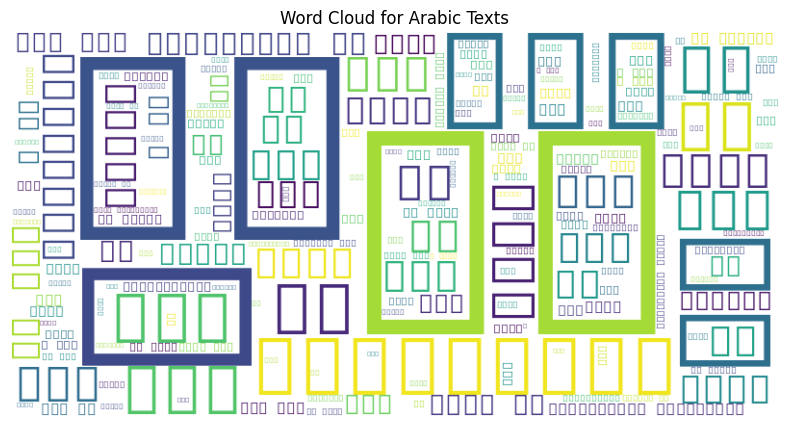

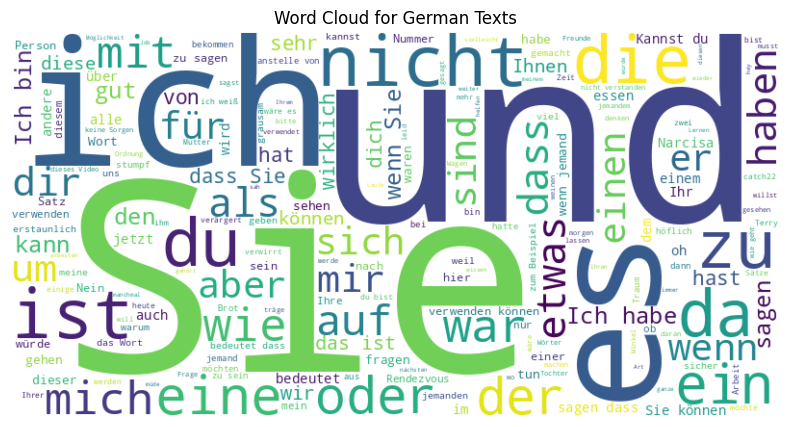

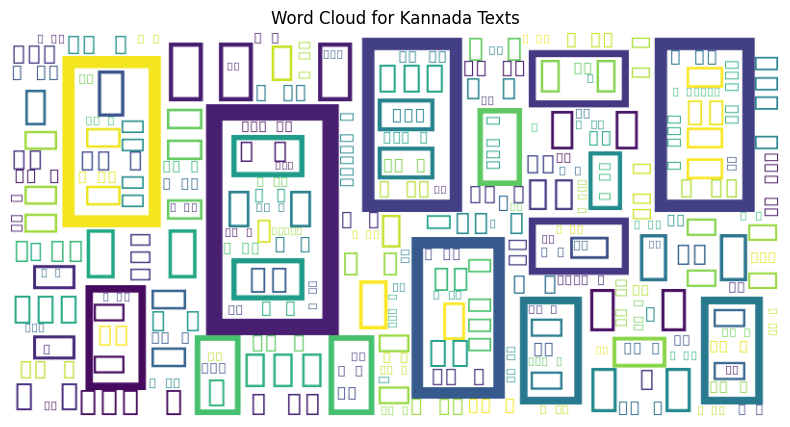

In [28]:
languages = data['Language'].unique()

for language in languages:
    language_texts = data[data['Language'] == language]['Text']
    combined_text = ' '.join(language_texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {language} Texts')
    plt.show()

In [29]:
data[data['Language']=='Hindi'].head(5)

Text Language
1979  विकिशब्दकोष एक मुक्त शब्दकोष एवं समानांतर कोष ...    Hindi
1980  42 अंत में विकिपीडिया एक पक्ष नहीं लेता है।43 ...    Hindi
1981  बोट्स नामक कंप्यूटर प्रोग्राम के निर्माण के बा...    Hindi
1982                     नहीं हम नहीं जानते जिमी ने कहा    Hindi
1983  60 कुछ आलोचकों का दावा है कि विकिपीडिया की खुल...    Hindi

In [33]:
data[data['Language']=='Malayalam'].head(5)

Text   Language
1385  ഭൗതികപ്രപഞ്ചത്തെ മൊത്തത്തിൽ സൂചിപ്പിക്കുന്ന പദ...  Malayalam
1386  ഭൗതികപ്രതിഭാസങ്ങളും ജീവനും പ്രകൃതിയുടെ ഘടകങ്ങളാണ്  Malayalam
1387  മനുഷ്യനിർമിതമായ വസ്തുക്കളെ പ്രകൃതിയുടെ ഭാഗമായി...  Malayalam
1388  അവയെ കൃത്രിമം എന്ന് വിശേഷിപ്പിക്കുന്നുഅഭിപ്രായ...  Malayalam
1389  പ്രകൃതി എന്ന പദം പ്രപഞ്ചത്തെയും അതിലെ സമസ്ത പ്...  Malayalam

In [34]:
data[data['Language']=='Tamil'].head(5)

Text Language
2042  விக்கிப்பீடியா Wikipedia ˌwɪkɪˈpiːdiə கேட்க wi...    Tamil
2043  தமிழ் விக்கிப்பீடியாவின் 100000க்கும் மேற்பட்ட...    Tamil
2044  பெரும்பாலும் இதன் எல்லாக் கட்டுரைகளும் இதனைப் ...    Tamil
2045  6 மேலும் இது கிட்டத்தட்ட 100000 முனைப்பான பங்க...    Tamil
2046  78 சனவரி 2021 வரையில் விக்கிப்பீடியா 285 மொழிக...    Tamil

In [35]:
data[data['Language']=='Arabic'].head(5)

Text Language
8962  نيتشر بالإنجليزية Nature‏ قد تعني    تعديل  تع...   Arabic
8963  ويكيبيديا هي موسوعة يمكن لأي مستخدم تعديل وتحر...   Arabic
8964  في مارس 2009 كان في ويكيبيديا 15 مليون مقالة ت...   Arabic
8965  في يوم 17 أغسطس، 2009 وصلت ويكيبيديا الإنجليزي...   Arabic
8966  8 تكتب المقالات تعاونيًا بواسطة متطوعين من حول...   Arabic

In [36]:
data[data['Language']=='Kannada'].head(5)

Text Language
9968  ನಾವೆಲ್ಲರೂ ಇಂಗ್ಲಿಷ್ನಲ್ಲಿ ಹೆಚ್ಚು ನಿರರ್ಗಳವಾಗಲು ತ್...  Kannada
9969  ಆದ್ದರಿಂದ ಇಂದು ನಾವು 10 ಹೊಸ ಸ್ಮಾರ್ಟ್ ಪದಗಳನ್ನು ಅವ...  Kannada
9970  ಮತ್ತು ಈ ವೀಡಿಯೊದಲ್ಲಿ ನಾನು ನಿಮಗೆ ದೈನಂದಿನ ಬಳಕೆಗಾಗ...  Kannada
9971  ನಾನು ನಿಜವಾಗಿಯೂ ನಿರರ್ಗಳವಾಗಿ ಸ್ಮಾರ್ಟ್ ವರ್ಡ್ ಸಂಖ್...  Kannada
9972  ಒಂದನ್ನು ಜೌಗು ಜೌಗು ಎಂದರೆ ಮುಳುಗಿಸುವುದು ಅಥವಾ ಪ್ರವ...  Kannada

In [86]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Text'])

sequences = tokenizer.texts_to_sequences(data['Text'])

data['Text'] = data['Text'].apply(lambda x: ' '.join(tokenizer.sequences_to_texts(tokenizer.texts_to_sequences([x]))))


<ipython-input-86-a288b2f9cff3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text'] = data['Text'].apply(lambda x: ' '.join(tokenizer.sequences_to_texts(tokenizer.texts_to_sequences([x]))))


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [125]:
x = data['Text']
y = data['Language']

In [133]:
if isinstance(x, list):
    x = np.array(x)

x_vec = CountVectorizer().fit_transform(x)

y_encoded = LabelEncoder().fit_transform(y)


In [134]:
x_vec.shape

(10271, 41343)

In [135]:
y_encoded.shape

(10271,)

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x_vec, y_encoded, test_size=0.3, random_state = 42)

In [142]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [137]:
naive = MultinomialNB().fit(x_train, y_train)
y_pred_nb = naive.predict(x_test)

In [138]:
print('MultinomialNB accuraccy:', r2_score(y_test, y_pred_nb))
print('MultinomialNB MAE:', mean_absolute_error(y_test, y_pred_nb))


MultinomialNB accuraccy: 0.9358721285693656
MultinomialNB MAE: 0.1573653471771577


In [139]:
rfr = RandomForestRegressor().fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)

In [140]:
print('Random Forest accuraccy:', r2_score(y_test, y_pred_rfr))
print('Random Forest MAE:', mean_absolute_error(y_test, y_pred_rfr))


Random Forest accuraccy: 0.8433926190579653
Random Forest MAE: 0.7382132851352193


In [147]:
rfr_cv = cross_val_score(RandomForestRegressor(), x_train, y_train, cv=5).round(2)
naives_cv = cross_val_score(MultinomialNB(), x_vec, y_encoded, cv=5).round(2)

CV_table1 = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'MultinomialNB'],
    'Cross Val Score': [rfr_cv, naives_cv],
    'Average CV score': [np.mean(rfr_cv), np.mean(naives_cv)],
    'Stdev CV score': [np.std(rfr_cv), np.std(naives_cv)]
})
CV_table1

Model                 Cross Val Score  Average CV score  \
0  Random Forest Regressor  [0.81, 0.85, 0.82, 0.83, 0.82]             0.826   
1            MultinomialNB  [0.99, 0.99, 0.98, 0.95, 0.96]             0.974   

   Stdev CV score  
0        0.013565  
1        0.016248

In [179]:
def find_treasure(instructions, money):
    n = len(instructions)
    max_instruction_change = min(1, money // 1)
    dp = [[float('inf')] * (money + 1) for _ in range(n)]
    dp[0][money] = 0

    for i in range(n - 1):
        for m in range(money + 1):
            if dp[i][m] != float('inf'):
                for change in range(1, max_instruction_change + 1):
                    next_room = min(n - 1, i + instructions[i] + change)
                    next_money = m - change
                    dp[next_room][next_money] = min(dp[next_room][next_money], dp[i][m] + 1)

    min_instructions = min(dp[-1])
    return min_instructions if min_instructions != float('inf') else None

In [180]:
instructions_2_1 = [1, 1, 1, 9]
instructions_2_2 = [1, 1, 2, 9]
instructions_2_3 = [2, 4, 1, 2, 10, 2, 3, 1, 9]

In [181]:
print(find_treasure(instructions_2_2,0))

None


In [155]:
def find_treasure(instructions, money):
    if not instructions or len(instructions) == 1:
        return None

    n = len(instructions)
    dp = [[float('inf')] * n for _ in range(money + 1)]
    dp[0][0] = 0


    for room in range(1, n):
        for m in range(money + 1):
            for instruction in range(1, instructions[room] + 2):
                if m >= instruction:
                    dp[m][room] = min(dp[m][room], dp[m -instruction][room - 1])
                else:
                    dp[m][room] = min(dp[m][room], dp[m - 1][room - 1] + 1)


    return dp[money][n - 1] if dp[money][n - 1] != float('inf') else None


